In [22]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from ImportFunctions.DecisionTreeAlgorithm import DecisionTreeAlgo, predict, determine_type_of_feature

## Random Forest Utilizes Bootstrapping to generate random samples

    -The first way in which this is implemented is by taking random row samples
    -The second way this is perfomed is using random features

In [18]:
from sklearn.datasets import load_wine

winedata = load_wine()
data = pd.DataFrame(winedata.data, columns=winedata.feature_names)
target = winedata.target
data['label'] = target

In [65]:
def train_test_split(data,test_size):

    test_size = round(test_size * len(data))
    
        
    indices = data.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)
    
    test_df = data.loc[test_indices]
    train_df = data.drop(test_indices)
    return train_df, test_df

0    0.331461
1    0.398876
2    0.269663
Name: label, dtype: float64

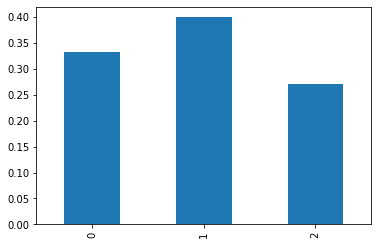

In [68]:
wineLabel = data['label'].value_counts(normalize=True)
wineLabel = wineLabel.sort_index()
wineLabel.plot(kind='bar')
wineLabel

In [67]:
random.seed(0)

train_df, test_df = train_test_split(data,0.2)

## Random Forest

In [78]:
def bootstrapping(train_df , n_boostrap):
    """
    n_bootstrap: how many examples we want to have in the dataset
    """
    bootstrap_indices = np.random.randint(low=0, high=len(train_df), size=n_boostrap)
    
    df_bootsrapped = train_df.iloc[bootstrap_indices]
    
    
    
    """
    returns a random set of rows
    """
    return df_bootsrapped





In [87]:
def get_potential_splits(data, random_subspace):
    
    potential_splits = {}
    
    _, n_columns = data.shape
    
    column_indices = list(range(n_columns - 1))
    
    if random_subspace and random_subspace < = len(column_indices):
        
        column_indices = random.sample(population=column_indices, k = random_subspace)
        

    for column_index in column_indices:

        values = data[:, column_index]
        
        univalues = np.unique(values)

        potential_splits[column_index] = univalues


    return potential_splits


SyntaxError: invalid syntax (<ipython-input-87-ecedc218fbd6>, line 9)

In [86]:
get_potential_splits(train_df.values, random_subspace=5)

{11: array([1.29, 1.3 , 1.33, 1.36, 1.42, 1.47, 1.48, 1.51, 1.56, 1.58, 1.59,
        1.6 , 1.62, 1.63, 1.64, 1.67, 1.68, 1.69, 1.71, 1.74, 1.75, 1.78,
        1.8 , 1.82, 1.83, 1.86, 1.93, 2.  , 2.01, 2.06, 2.11, 2.12, 2.14,
        2.15, 2.26, 2.3 , 2.31, 2.44, 2.46, 2.48, 2.5 , 2.57, 2.63, 2.65,
        2.69, 2.71, 2.72, 2.73, 2.74, 2.75, 2.77, 2.78, 2.81, 2.82, 2.83,
        2.84, 2.85, 2.87, 2.88, 2.9 , 2.91, 2.93, 2.96, 3.  , 3.02, 3.05,
        3.07, 3.1 , 3.13, 3.14, 3.16, 3.17, 3.19, 3.2 , 3.21, 3.22, 3.26,
        3.28, 3.3 , 3.31, 3.33, 3.35, 3.36, 3.37, 3.38, 3.4 , 3.44, 3.45,
        3.48, 3.5 , 3.52, 3.53, 3.55, 3.56, 3.57, 3.58, 3.59, 3.63, 3.69,
        3.71, 3.92, 4.  ]),
 6: array([0.34, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.55, 0.56, 0.57, 0.58,
        0.6 , 0.61, 0.63, 0.65, 0.66, 0.68, 0.69, 0.7 , 0.75, 0.76, 0.78,
        0.83, 0.84, 0.92, 0.99, 1.02, 1.09, 1.1 , 1.2 , 1.22, 1.25, 1.28,
        1.3 , 1.36, 1.41, 1.46, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.64, 1.69,
   